In [85]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [105]:
experiment_name = 'gaussian20d_p300'
df = pd.read_csv(f'/home/lclaeys/eigenfunction-solver/experiments/quadratic_energy/{experiment_name}')
df = df[df['k'] > 1].copy()

In [88]:
dfs = []
for i in range(10):
    experiment_name = f'randomdiag/20d_{i}'
    df = pd.read_csv(f'/home/lclaeys/eigenfunction-solver/experiments/quadratic_energy/{experiment_name}.csv')
    df['i'] = i
    dfs.append(df)

df = pd.concat(dfs)

In [106]:
metrics = ['eigen_error','orth_error','eigen_cost', 'eigenvalue_mse','eigenfunc_mse','fitted_eigenvalue_mse','fitted_eigen_error', 'linear_reconstruction', 'L_linear_reconstruction', 'quadratic_reconstruction', 'L_quadratic_reconstruction']
#metrics = ['eigen_error','orth_error','eigen_cost', 'fitted_eigen_error', 'linear_reconstruction', 'L_linear_reconstruction','quadratic_reconstruction', 'L_quadratic_reconstruction']


/home/lclaeys/miniconda3/envs/efs-env/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)
/home/lclaeys/miniconda3/envs/efs-env/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)
/home/lclaeys/miniconda3/envs/efs-env/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)
/home/lclaeys/miniconda3/envs/efs-env/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


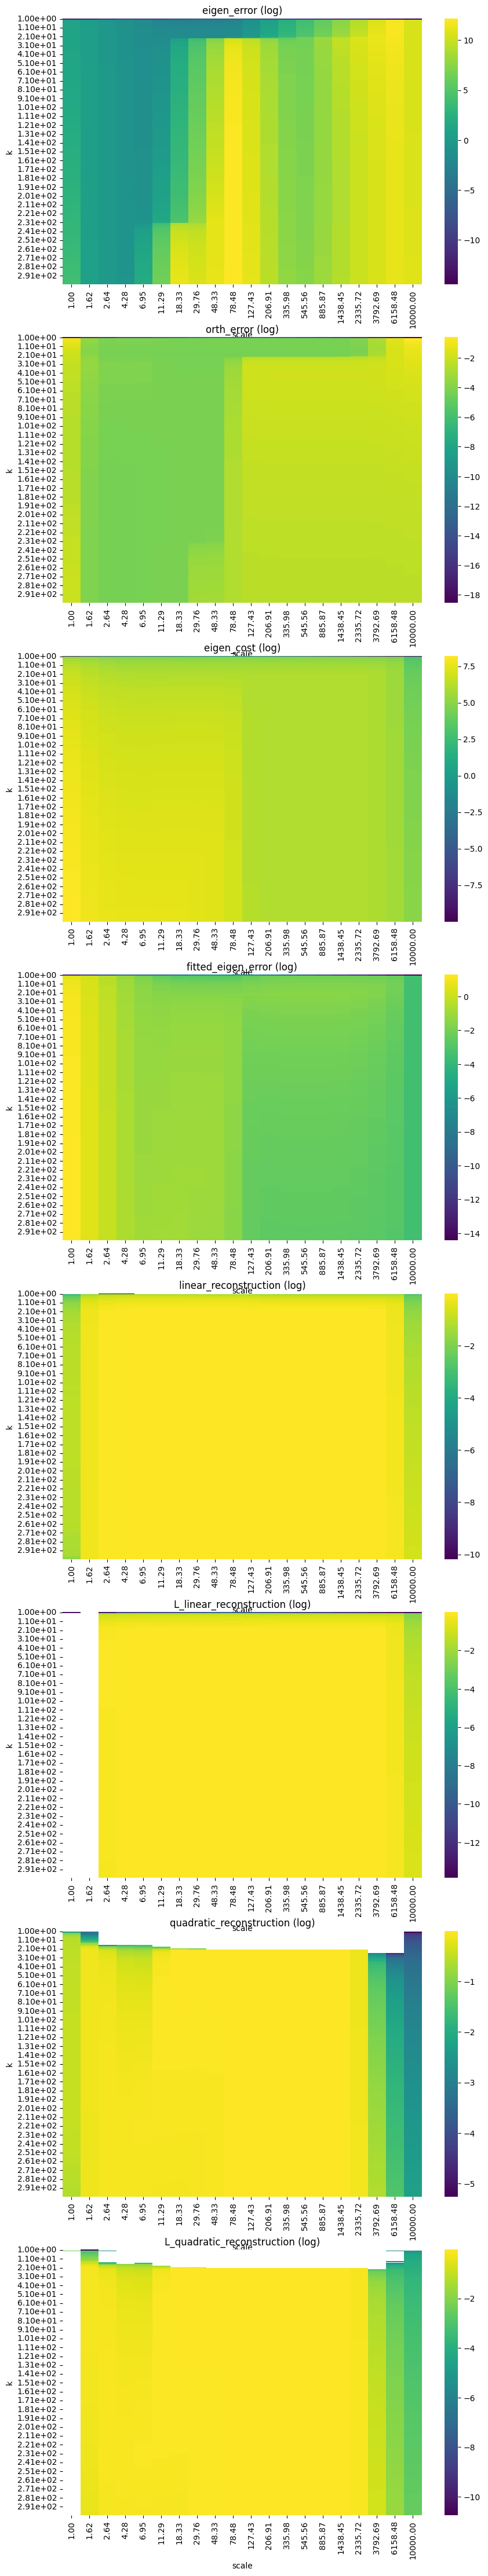

In [9]:
hyperparam_1 = 'k'
hyperparam_2 = 'scale'

fig, ax = plt.subplots(len(metrics),1,figsize=(10,len(metrics)*7))
for i in range(len(metrics)):
    pivot_table = pd.pivot_table(df, index = hyperparam_1, columns = hyperparam_2, values = metrics[i], aggfunc = 'mean')
    pivot_table.index = pivot_table.index.map(lambda x: f"{x:.2e}")
    pivot_table.columns = pivot_table.columns.map(lambda x: f"{x:.2f}") 
    sns.heatmap(np.log10(pivot_table), cmap='viridis',ax=ax[i])
    ax[i].set_title(f'{metrics[i]} (log)')


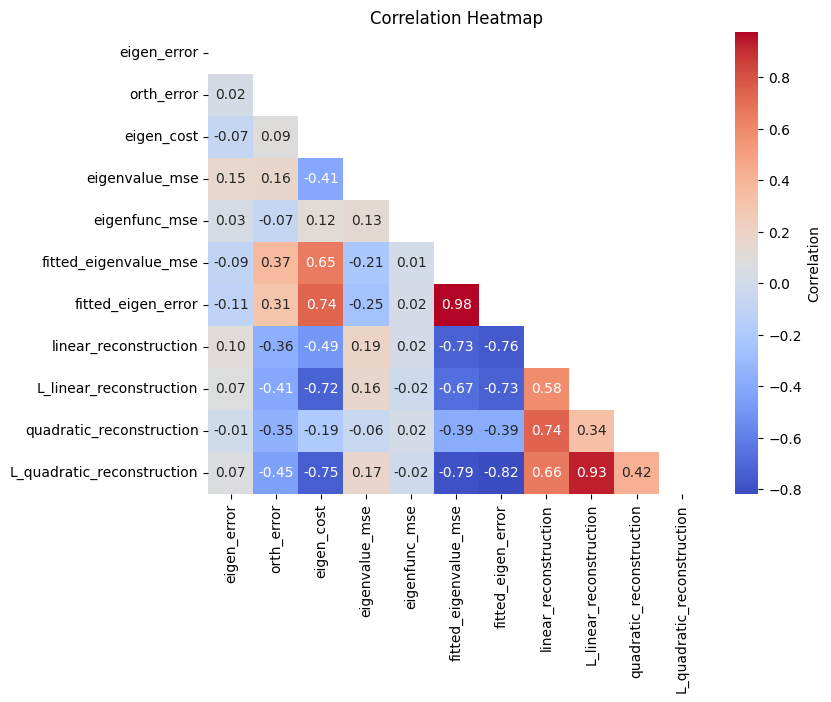

In [90]:
corr = df[df['quadratic_reconstruction']>0].loc[:,metrics].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.show()

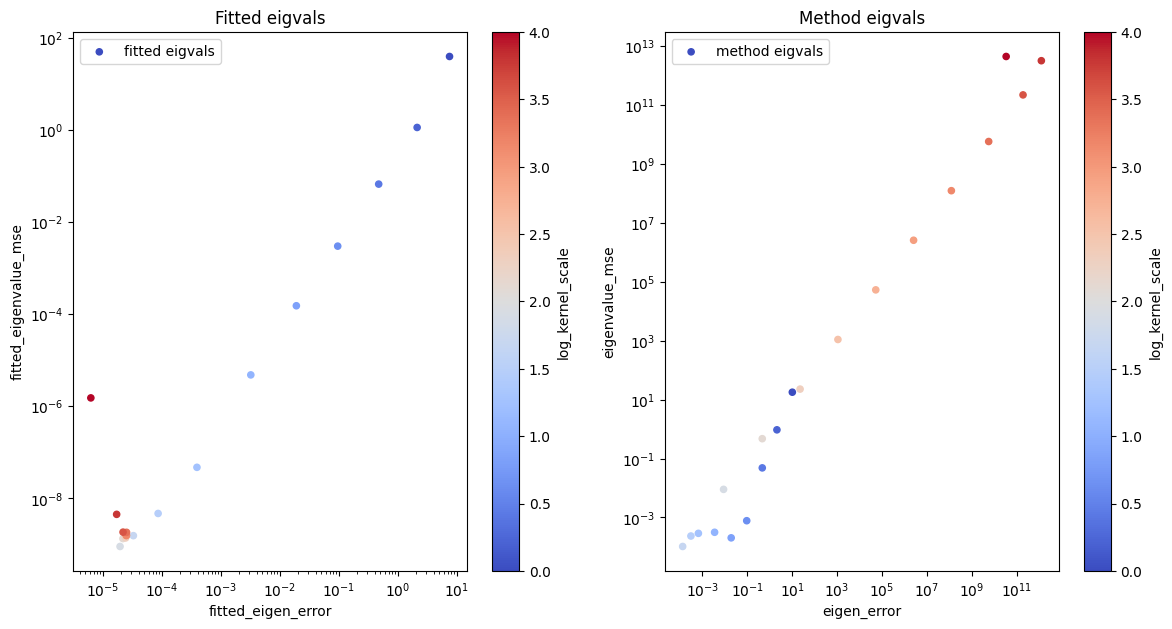

In [108]:
fig, axes = plt.subplots(1,2,figsize=(14,7))
df['log_kernel_scale'] = np.log10(df['scale'])
df['size'] = df['k']/5

#df['size'] = (df['num_samples'] - df['num_samples'].min())/(df['num_samples'].max()-df['num_samples'].min())*15
df[df['k']==10].plot.scatter(x='fitted_eigen_error',
                y='fitted_eigenvalue_mse',
                ax=axes[0],
                c='log_kernel_scale',
#                s='size',
                cmap='coolwarm',
                label = 'fitted eigvals')

df[df['k']==10].plot.scatter(x='eigen_error',
                y='eigenvalue_mse',
                ax=axes[1],
                c='log_kernel_scale',
#                s='size',
                cmap='coolwarm',
                label = 'method eigvals')

axes[0].set_title('Fitted eigvals')
axes[1].set_title('Method eigvals')

for ax in axes:
    #ax.set_xlim(1e-6,1e2)
    #ax.set_ylim(1e-10,1e2)

    ax.set_xscale('log')
    ax.set_yscale('log')

In [109]:
df['eigen_cost'] = df['eigen_cost']*df['k']/df['num_samples']

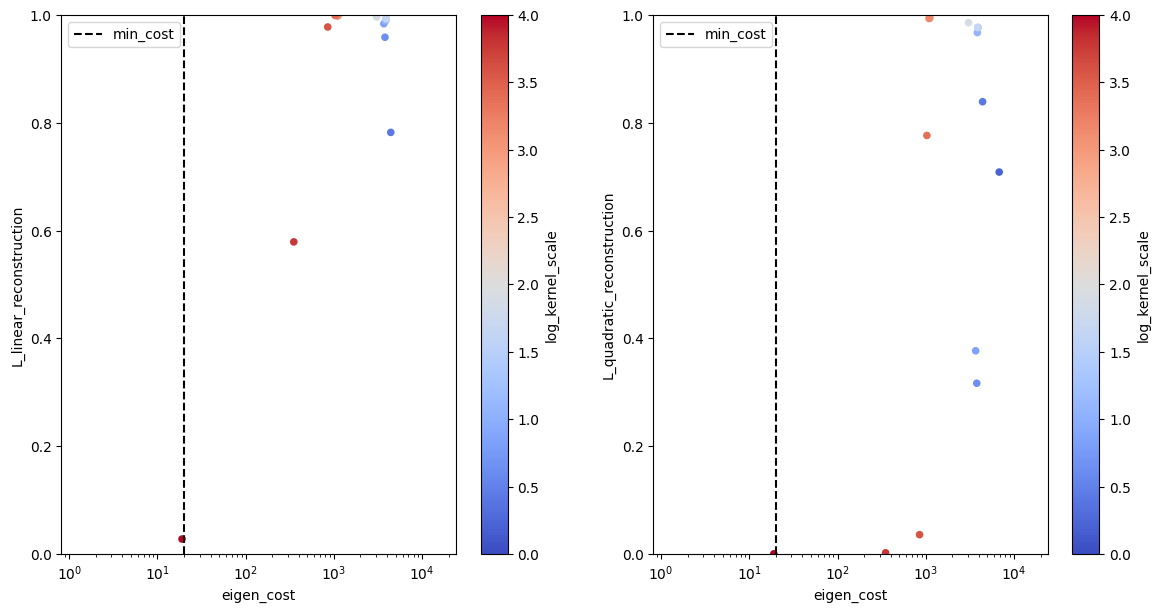

In [112]:
fig, axes = plt.subplots(1,2,figsize=(14,7))
df['log_kernel_scale'] = np.log10(df['scale'])
df['size'] = df['k']/5
#df['p_size'] = (df['p'] - df['p'].min())/(df['p'].max()-df['p'].min())*15
#df['reg_size'] = -np.log10(df['L_reg'])*3
df[df['k']== 50].plot.scatter(x='eigen_cost',
                y='L_linear_reconstruction',
                ax=axes[0],
                c='log_kernel_scale',
#                s='size',
                cmap='coolwarm')

df[df['k']== 50].plot.scatter(x='eigen_cost',
                y='L_quadratic_reconstruction',
                ax=axes[1],
                c='log_kernel_scale',
#                s='size',
                cmap='coolwarm')

for ax in axes:

    ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_ylim(0,1)
    #ax.set_xlim(1e-6,1e2)
    ax.vlines(20,0,1,color='black',ls='--', label = 'min_cost')
    ax.legend()


In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,7))
df['log_kernel_scale'] = np.log10(df['scale'])
df['size'] = df['k']/5

#df['size'] = (df['num_samples'] - df['num_samples'].min())/(df['num_samples'].max()-df['num_samples'].min())*15
df[df['k']==10].plot.scatter(x='fitted_eigen_error',
                y='fitted_eigenvalue_mse',
                ax=axes[0],
                c='log_kernel_scale',
#                s='size',
                cmap='coolwarm',
                label = 'fitted eigvals')

df[df['k']==10].plot.scatter(x='fitted_eigen_error',
                y='orth_error',
                ax=axes[1],
                c='log_kernel_scale',
#                s='size',
                cmap='coolwarm',
                label = 'method eigvals')

axes[0].set_title('Fitted eigvals')
axes[1].set_title('Method eigvals')

for ax in axes:
    #ax.set_xlim(1e-6,1e2)
    #ax.set_ylim(1e-10,1e2)

    ax.set_xscale('log')
    ax.set_yscale('log')

In [36]:
df['log_kernel_scale']

0       0.000000
1       0.210526
2       0.421053
3       0.631579
4       0.842105
          ...   
5995    3.157895
5996    3.368421
5997    3.578947
5998    3.789474
5999    4.000000
Name: log_kernel_scale, Length: 60000, dtype: float64

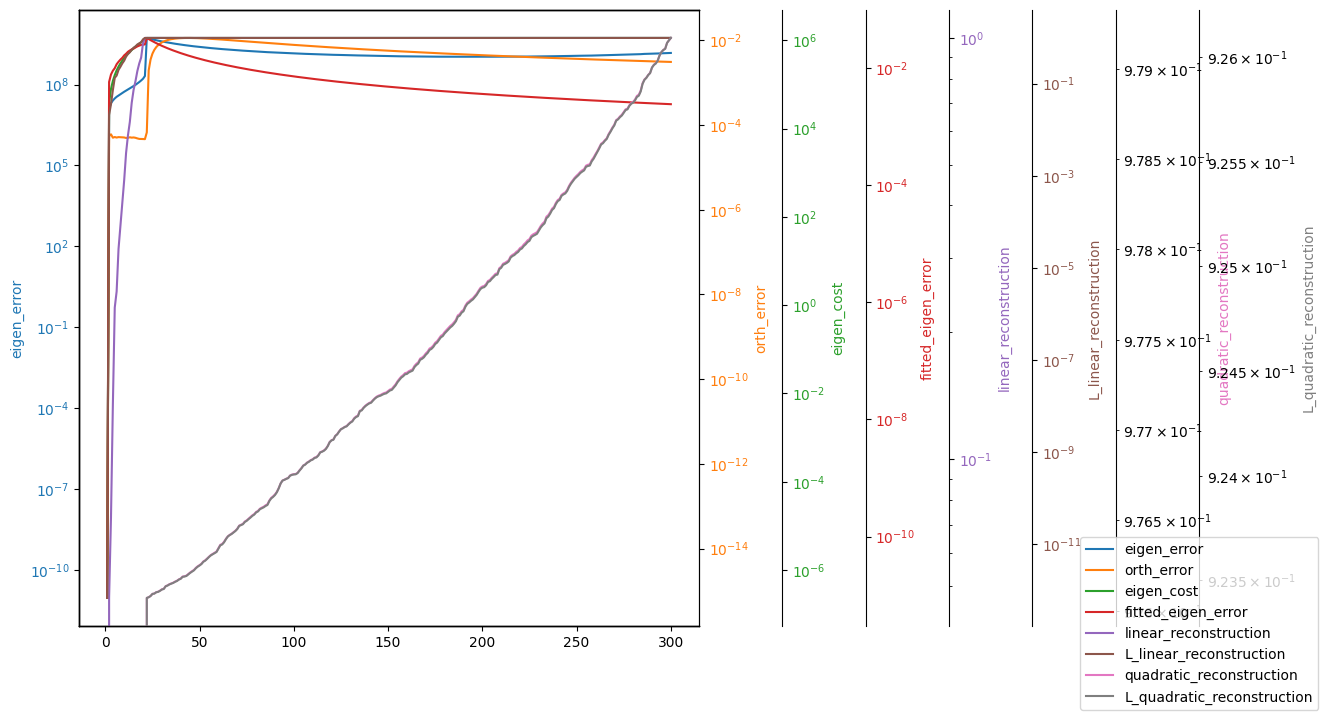

In [46]:
hyperparam = 'k'

agg_df = df[(df['log_kernel_scale'] >= 3) & (df['log_kernel_scale'] <= 3.2)].groupby(hyperparam)[metrics].mean().sort_index()
# Create a figure
fig, ax = plt.subplots(figsize=(8,8))

# Store axes for later adjustments
axes = [ax]

# Plot the first column
ax.plot(agg_df.index, agg_df.iloc[:, 0], label=agg_df.columns[0], color="C0")
ax.set_ylabel(agg_df.columns[0], color="C0")
ax.tick_params(axis="y", labelcolor="C0")

# Add additional axes for other columns
colors = plt.cm.tab10.colors  # Use a colormap for unique colors
for i, column in enumerate(agg_df.columns[1:], start=1):
    new_ax = ax.twinx()
    new_ax.spines["right"].set_position(("outward", 60 * (i - 1)))  # Offset by 60 points per axis
    new_ax.plot(agg_df.index, agg_df[column], label=column, color=colors[i % len(colors)])
    new_ax.set_ylabel(column, color=colors[i % len(colors)])
    new_ax.tick_params(axis="y", labelcolor=colors[i % len(colors)])
    axes.append(new_ax)

# Add a legend
fig.legend(agg_df.columns, loc="lower right")
for ax in axes:
    ax.set_yscale('log')

KeyboardInterrupt: 

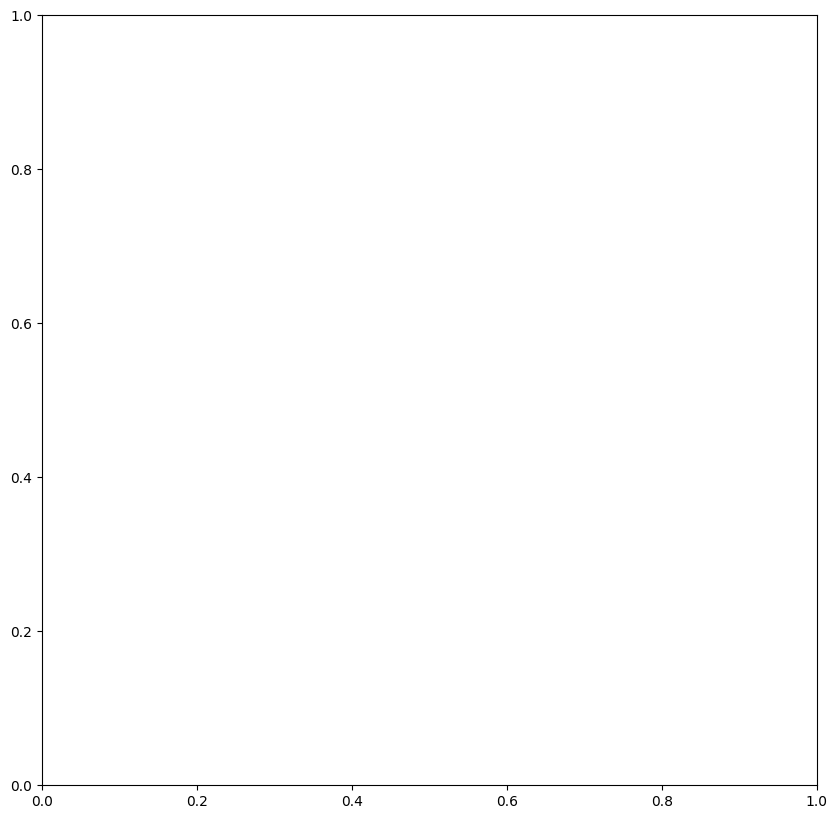

In [59]:
fig, ax = plt.subplots(figsize=(10,10))

lines1 = sns.lineplot(df,
                      x='k',
                      y='eigen_cost',
                      hue='log_kernel_scale',
                      palette='coolwarm',
                      ax=ax, 
                      estimator = 'mean',
                      errorbar='ci')

plt.legend()

plt.yscale('log')  

### reconstruction

(0.0, 1.0)

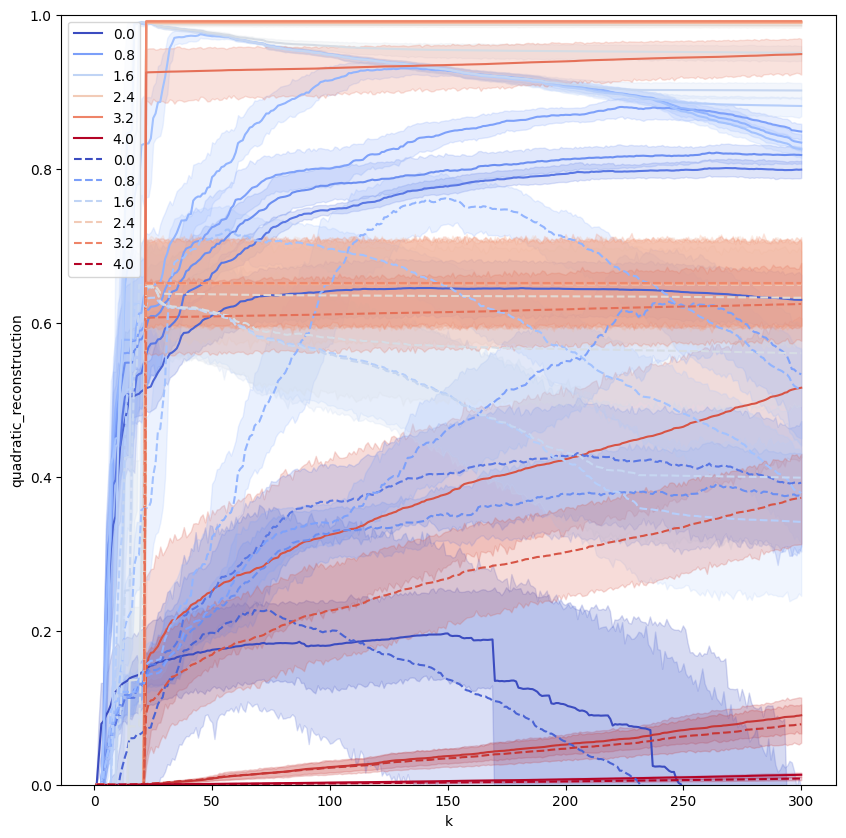

In [60]:
fig, ax = plt.subplots(figsize=(10,10))

lines1 = sns.lineplot(df,
                      x='k',
                      y='quadratic_reconstruction',
                      hue='log_kernel_scale',
                      palette='coolwarm',
                      ax=ax, 
                      estimator = 'mean',
                      errorbar='ci')

lines2 = sns.lineplot(df,
                      x='k',
                      y='L_quadratic_reconstruction',
                      hue='log_kernel_scale',
                      palette='coolwarm',
                      ax=ax, 
                      estimator = 'mean',
                      errorbar='ci', ls = '--')

plt.legend()

plt.ylim(0,1)  

(np.float64(6.393124073862389e-06), 10)

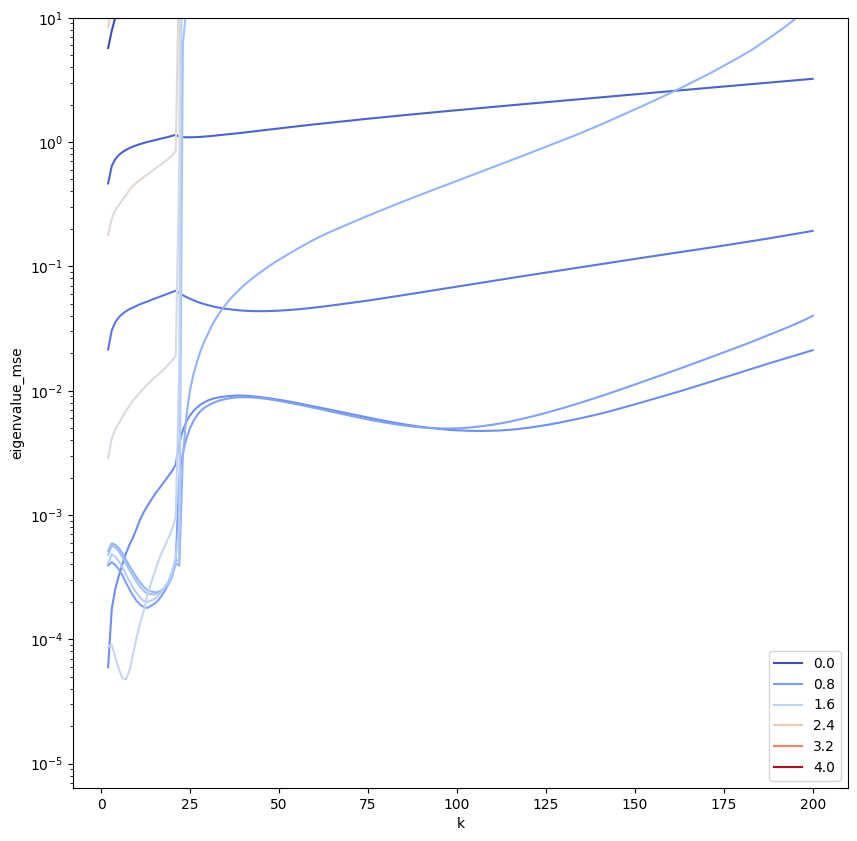

In [103]:
fig, ax = plt.subplots(figsize=(10,10))

lines1 = sns.lineplot(df,x='k',y='eigenvalue_mse',hue='log_kernel_scale',palette='coolwarm',ax=ax)
#lines2 = sns.lineplot(df,x='k',y='L_quadratic_reconstruction',hue='log_kernel_scale',palette='coolwarm',ls='--',ax=ax)

ax.set_yscale('log')
plt.legend()
plt.ylim(None,10)

(0.0, 1.0)

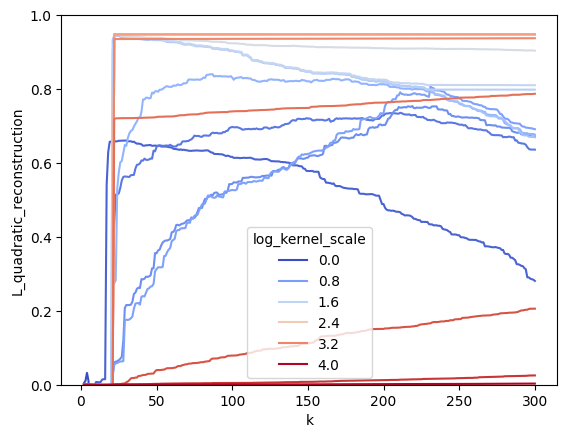

In [26]:
sns.lineplot(df,x='k',y='L_quadratic_reconstruction',hue='log_kernel_scale',palette='coolwarm')
plt.ylim(0,1)

In [38]:
def smallest_combinations(x, m):
    n = len(x)

    # Instead of sorting x, keep it as is
    indices = list(range(n))  # Use indices to track original order
    
    heap = []
    visited = set()
    
    # Start with the combination (0, 0, ..., 0)
    initial = (0, [0] * n)  # (S, a_vector)
    heapq.heappush(heap, initial)
    visited.add(tuple([0] * n))
    
    vals = []
    vecs = []
    
    while len(vals) < m:
        S, a_vector = heapq.heappop(heap)
        vals.append(S) 
        vecs.append(a_vector)

        # Generate new combinations
        for i in range(n):
            new_a_vector = a_vector[:]
            new_a_vector[i] += 1
            new_S = S + x[i]
            
            if tuple(new_a_vector) not in visited:
                heapq.heappush(heap, (new_S, new_a_vector))
                visited.add(tuple(new_a_vector))
    
    # Restore the original unsorted order if needed
    return np.array(vals), np.array(vecs)

In [39]:
vals, vecs = smallest_combinations(np.array([1,0.5,0.7]),50)

In [29]:
M = 3
cov_1 = np.array([[1,0],[0,1]])
cov_2 = np.array([[1,0],[0,1/2]])
cov_3 = np.array([[1,0],[0,2]])

covs = np.array([cov_1,cov_2,cov_3])

In [30]:
inv_covs = np.array([np.linalg.inv(covs[i]) for i in range(M)])

In [31]:
inv_covs

array([[[1. , 0. ],
        [0. , 1. ]],

       [[1. , 0. ],
        [0. , 2. ]],

       [[1. , 0. ],
        [0. , 0.5]]])

In [33]:
x = np.array([[1,1],[2,2],[-1,-1],[0,0]])

In [58]:
[[x[i]@inv_covs[j]@x[i] for i in range(4)] for j in range(M)]

[[np.float64(2.0), np.float64(8.0), np.float64(2.0), np.float64(0.0)],
 [np.float64(3.0), np.float64(12.0), np.float64(3.0), np.float64(0.0)],
 [np.float64(1.5), np.float64(6.0), np.float64(1.5), np.float64(0.0)]]

In [59]:
np.einsum('ij,kjj,ij->ik',x,inv_covs,x)

array([[ 2. ,  3. ,  1.5],
       [ 8. , 12. ,  6. ],
       [ 2. ,  3. ,  1.5],
       [ 0. ,  0. ,  0. ]])

In [62]:
np.linalg.det(covs)

array([1. , 0.5, 2. ])

In [64]:
x - np.array([1,2])

array([[ 0, -1],
       [ 1,  0],
       [-2, -3],
       [-1, -2]])

In [65]:
from src.energy.gaussian_mixture import GaussianMixture

ModuleNotFoundError: No module named 'src'